**Business Understanding**

- Dataset source:  dataset from the MIMIC-III database
- Contains information on in-hospital mortality from the monitoring of patients in the Intensive Care Unit (ICU) for 48 hours

In [22]:
#loading required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

In [23]:
# Eye balling the data
df = pd.read_csv('ihm_48_hours.csv')
df.head()

,Capillary refill rate,Diastolic blood pressure,Fraction inspired oxygen,Glascow coma scale eye opening,Glascow coma scale motor response,Glascow coma scale total,Glascow coma scale verbal response,Glucose,Heart Rate,Height,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature,Weight,pH,Patient_id,target
0,NaN,73.0,NaN,Spontaneously,Obeys Commands,NaN,Oriented,-11.396037,-19.976803,NaN,76.0,94.000000,17.0,116.0,36.388889,83.5,NaN,30552,0
1,NaN,73.0,NaN,Spontaneously,Obeys Commands,NaN,Oriented,115.000000,96.000000,NaN,76.0,95.000000,18.0,116.0,36.388889,83.5,NaN,30552,0
2,NaN,73.0,NaN,Spontaneously,Obeys Commands,NaN,Oriented,115.000000,96.000000,NaN,76.0,-6.497052,18.0,116.0,36.388889,83.5,NaN,30552,0
3,NaN,73.0,NaN,Spontaneously,Obeys Commands,NaN,Oriented,115.000000,96.000000,NaN,76.0,95.000000,18.0,116.0,36.388889,83.5,NaN,30552,0
4,NaN,73.0,NaN,Spontaneously,Obeys Commands,NaN,Oriented,115.000000,96.000000,NaN,76.0,95.000000,18.0,116.0,36.388889,83.5,NaN,30552,0


**Data Understanding**

| Column Name                         | Description                                                                 |
|-------------------------------------|-----------------------------------------------------------------------------|
| Capillary refill rate               | The time it takes for color to return to an external capillary bed (such as a fingertip) after pressure is applied. It is an indicator of peripheral perfusion. |
| Diastolic Blood Pressure            | The pressure in the arteries when the heart rests between beats. It's the lower of the two blood pressure measurements. |
| Fraction inspired oxygen            | The concentration of oxygen in the air mixture that is inhaled by the patient, often measured in ventilated patients. |
| Glascow coma scale eye opening      | A component of the Glasgow Coma Scale (GCS) that measures a patient's ability to open their eyes in response to stimuli. |
| Glascow coma scale motor response    | A component of the GCS that assesses a patient's motor response to stimuli, indicating brain function. |
| Glascow coma scale total            | The total score of the Glasgow Coma Scale, which assesses the level of consciousness in a person following a traumatic brain injury. |
| Glascow coma scale verbal response   | A component of the GCS that evaluates a patient’s verbal response, indicating their level of consciousness. |
| Glucose                             | The level of sugar (glucose) in the blood, an important indicator of metabolic status. |
| Heart Rate                          | The number of heartbeats per minute, indicating the functioning of the cardiovascular system. |
| Height                              | The measurement of a patient's stature, typically recorded in centimeters or meters. |
| Mean blood pressure                 | The average pressure in a patient's arteries during one cardiac cycle, indicating overall blood pressure. |
| Oxygen saturation                   | The percentage of hemoglobin binding sites in the bloodstream occupied by oxygen, indicating the oxygenation status of the patient. |
| Respiratory rate                    | The number of breaths taken per minute, indicating the patient’s respiratory status. |
| Systolic blood pressure             | The pressure in the arteries when the heart beats. It is the higher of the two blood pressure measurements. |
| Temperature                         | The body temperature of the patient, indicating metabolic and homeostatic status. |
| Weight                              | The body mass of the patient, typically recorded in kilograms. |
| pH                                  | The measure of acidity or alkalinity of the blood, indicating the balance of acids and bases in the body. |
| Patient_id                          | A unique identifier assigned to each patient. |
| target                              | The outcome or variable of interest- for this project -> mortality|

In [24]:
# Shape of the dataset
shape = df.shape
print('The dataset contains', shape[0], 'rows and', shape[1], 'columns.')

The dataset contains 300912 rows and 19 columns.


In [25]:
# checking the data types
df.dtypes

Capillary refill rate                 float64
Diastolic blood pressure              float64
Fraction inspired oxygen              float64
Glascow coma scale eye opening         object
Glascow coma scale motor response      object
Glascow coma scale total              float64
Glascow coma scale verbal response     object
Glucose                               float64
Heart Rate                            float64
Height                                float64
Mean blood pressure                   float64
Oxygen saturation                     float64
Respiratory rate                      float64
Systolic blood pressure               float64
Temperature                           float64
Weight                                float64
pH                                    float64
Patient_id                             object
target                                  int64
dtype: object

**Insights:**

- **Numerical variables** : Capillary refill rate ,Diastolic blood pressure, Fraction inspired oxygen, Glascow coma scale total, Glucose, Heart Rate, Height, Mean blood pressure, Oxygen saturation,Respiratory rate, Systolic blood pressure, Temperature, Weight, pH, target

- **Categorical variables** : Glascow coma scale eye opening, Glascow coma scale motor response, Glascow coma scale verbal response, Patient_id.




In [26]:
# Descriptive Statistics -> Categorical
df.describe(include='object')


,Glascow coma scale eye opening,Glascow coma scale motor response,Glascow coma scale verbal response,Patient_id
count,274190,296978,296884,300912
unique,7,12,12,6269
top,4 Spontaneously,6 Obeys Commands,1.0 ET/Trach,30552
freq,94516,115595,87646,48


**Insights:**

- We do not have binary categorical variables present in the dataset, since none of the categorical variables have a unique value of 2.
- However we have nominal categorical variables(Have no order). They include:

- **1.Glascow coma scale eye opening**
    - This variable has 7 unique categories.
    - The category that has the highest number of observations is 4 Spontaneously which has 94516 observations.

- **2.Glascow coma scale motor response**
    - This variable has 12 unique categories.
    - The category that has the highest number of observations is 6 Obeys Commands which has 115595 observations.

- **3.Glascow coma scale verbal response**
    -This variable has 12 unique categoriries.
    - The category that has the highest number of observation is 1.0 ET/Trach which has 87646 observations.

- **4.Patient_id**
    - This variable has 6269 unique categories. This might imply 6269 patients participated in the study.
    - The count of this variable is 300912. Thus there is a possibility that data was collected from the patients more than once.


In [27]:
# Descriptive statistics -> Nuerical variables
df.describe()

,Capillary refill rate,Diastolic blood pressure,Fraction inspired oxygen,Glascow coma scale total,Glucose,Heart Rate,Height,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature,Weight,pH,target
count,6336.000000,296944.000000,88464.000000,184416.000000,300698.000000,300912.000000,55824.000000,296984.00000,300912.000000,300864.000000,300912.000000,298848.000000,221040.000000,230614.000000,300912.000000
mean,0.219223,62.541099,0.599884,10.818123,130.628329,79.447793,168.543422,78.79108,95.343460,18.731265,119.694213,36.832834,82.969018,5.573617,0.142128
std,0.413753,341.559624,0.253919,4.334923,84.171126,32.145920,15.137414,29.52986,2529.203751,6.884248,23.396042,1.000075,26.765857,5.963634,0.349182
min,0.000000,0.000000,0.000000,3.000000,-19.999974,-19.999623,0.000000,-34.00000,-19.999687,0.000000,0.000000,0.000000,0.000000,-19.999706,0.000000
25%,0.000000,51.000000,0.400000,8.000000,101.000000,70.000000,160.000000,68.00000,95.000000,15.000000,103.000000,36.277802,66.600000,7.310000,0.000000
50%,0.000000,59.000000,0.500000,11.000000,126.000000,84.000000,170.000000,77.00000,98.000000,18.000000,117.000000,36.833333,79.099998,7.370000,0.000000
75%,0.000000,69.000000,0.700000,15.000000,158.000000,97.000000,178.000000,88.00000,100.000000,22.000000,134.000000,37.388889,94.699997,7.420000,0.000000
max,1.000000,100105.010000,7.100000,15.000000,9999.000000,941.000000,203.000000,9381.00000,981023.000000,1211.000000,295.000000,73.760002,931.224376,99.000000,1.000000


**Insights:**

- **Capillary refill rate:**   
    - Has a 6336 data points
    - Has a range from 0 to 1, hence implying it might be a binary variable.
- **Diastolic blood pressure:**
    - Has 296944 data points recorded.
    - High standard deviation(Mean = 62.541, standard deviation = 341.559).
    - Ranges from 0 to 100105. Compared to the quartiles, this variable might have outliers.
    
- **Fraction inspired oxygen:**
    - The mean is 0.599,with a standard deviation of 0.25
    - Ranges from 0 to 7.1. 
- **Glascow coma scale total:**
    - The mean is 10.818,with a standard deviation of 4.33
    - Ranges from 3 to 15, with most values clustering around the higher end of this range. 

- **Glucose:**
    - The mean glucose level is 130.63 ,with a standard deviation of 84.17, which is quite large
    - Ranges from 0 to -19.99 to 9999.   

- **Heart Rate:**
    - Has 300912 records
    - Most rates average at around a mean of 79 beats per minute
    - Has a standard deviation of of 32.15 (moderate variability)
    - The least value is -19.999623 and maximum value is 941
    - based on the quatiles, most values fall between 70 and 97 beats per minutes(bpm) with a median value of 84 bpm
    - Note that there might exist errors in the data collected especially during data entry 

- **Height:**
    - Has 55824 records
    - Most heights average at around a mean of 168.54
    - Has a standard deviation of 15.14 which is not a very big deviation from the central points 
    - Most of the heights fall between 160 to 178 with a median of 170
    - Tallest individual had a height of 203 and shortest individual had a height of 0 (probable error here)

- **Mean blood pressure:**
    - Has 296984 records
    - Most levels average at around a mean of 78.79 mg/dL.
    - Has a standard deviation of 29.529 which is exudes a deviation from the central points 
    - Most of the levels fall between 68 and 88 with
    - Data set has a minimum value of -34 and max value of 9381, this is a possible data error

- **Oxygen saturation:**
    - Has 300912 records
    - Data averages with a mean of 95.343460
    - Has a standard deviation of 2529.203752, which is very high. This shows that there may exist outliers in the data
    - The Oxygen saturation levels fall between 95 and 100 with a central point of 98
    - The least saturation level recorded is -19.999687 and highest value of 981023(this is a possible error)

- **Respiratory rate:**
    - Has 300864 records
    - Data averages with a mean of 18.731265
    - Has as standard deviation of 6.884248(moderate variability), which is significantly ok hence data quality might be ok
    - The lowest value is 0 and largest being 1211(this may be erronoeus since the value is quite large)
    - The rates range between 15 and 22 with a median of 18

- **Systolic blood pressure:**
    - Has  300912 records
    - Data averages with a mean of  119.694213
    - Has as standard deviation of 23.396042(moderate variablity)
    - The lowest value is 0 and largest being 295
    - The rates range between 103 and 134 with a median of 117

- **Temperature:**
    - Has 298848 records
    - Data averages around 36.832834°C
    - Has as standard deviation of 1.000, which is small hence data quality might be ok
    - The lowest level is 0°C and largest being 73.76°C
    - The rates range between 36.277802°C and 37.388889°C with a median of 36.833333°C

- **Weight:**
    - Has 221040 records
    - Data averages with a mean of 82.969018
    - Has a standard deviation of 26.765857, which expresses that the data quality might not be ok
    - The lowest weight is at 0 and largest at 931.224376
    - The weights range between 66.600000 and 94.699997 with a median value of 79.099998

- **pH:**
    - Has 230614 records
    - Data averages with a mean of 5.573617
    - Has a standard deviation of 5.963634, which is not as high but expresses that the data quality might not be ok but at an insignificant level
    - The lowest weight is at -19.999706 and largest at 99
    - The weights range between 7.310000 and 7.420000 with a median value of 7.370000, the data seems to be compromised in term sof data quality because of the min and max values there exists outliers 



*Generally:*
- *Based on the above the data quality is challenged, as some features contain outliers and other contain missing values.*
              


## Outlier Detection

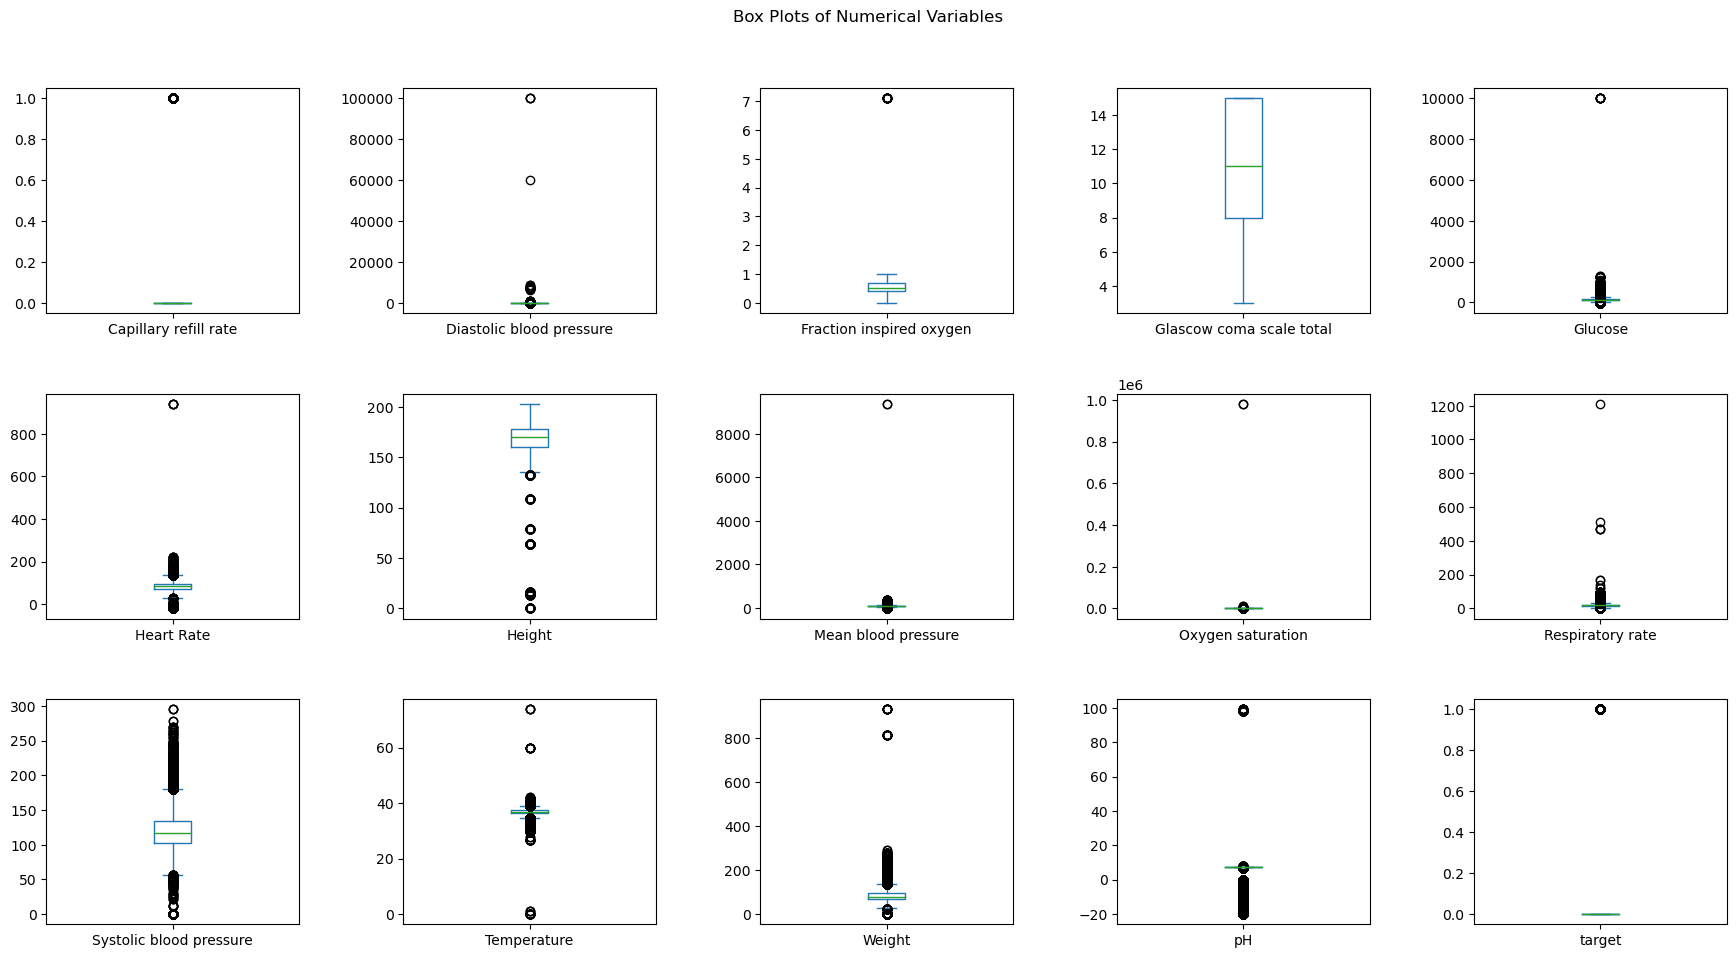

In [28]:
# Boxplots

# Select only numerical columns (float64 and int64)
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Plot boxplots for each numerical variable
numerical_columns.plot(kind='box', subplots=True, layout=(3, 5), figsize=(18, 10), title='Box Plots of Numerical Variables')

plt.suptitle('Box Plots of Numerical Variables')  # Adding a super title for the entire figure
plt.tight_layout(pad=3.0)  # Adjusts the layout to make sure labels and titles fit well
plt.show()

**Insights:

-  Most of the numerical variables seem to have outliers except the Glascow coma scale total which does not have any outliers.

## Mising values

In [29]:
# checking the percentage of missing values
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)


Capillary refill rate                 97.894401
Diastolic blood pressure               1.318658
Fraction inspired oxygen              70.601372
Glascow coma scale eye opening         8.880337
Glascow coma scale motor response      1.307359
Glascow coma scale total              38.714309
Glascow coma scale verbal response     1.338597
Glucose                                0.071117
Heart Rate                             0.000000
Height                                81.448397
Mean blood pressure                    1.305365
Oxygen saturation                      0.000000
Respiratory rate                       0.015952
Systolic blood pressure                0.000000
Temperature                            0.685915
Weight                                26.543308
pH                                    23.361647
Patient_id                             0.000000
target                                 0.000000
dtype: float64


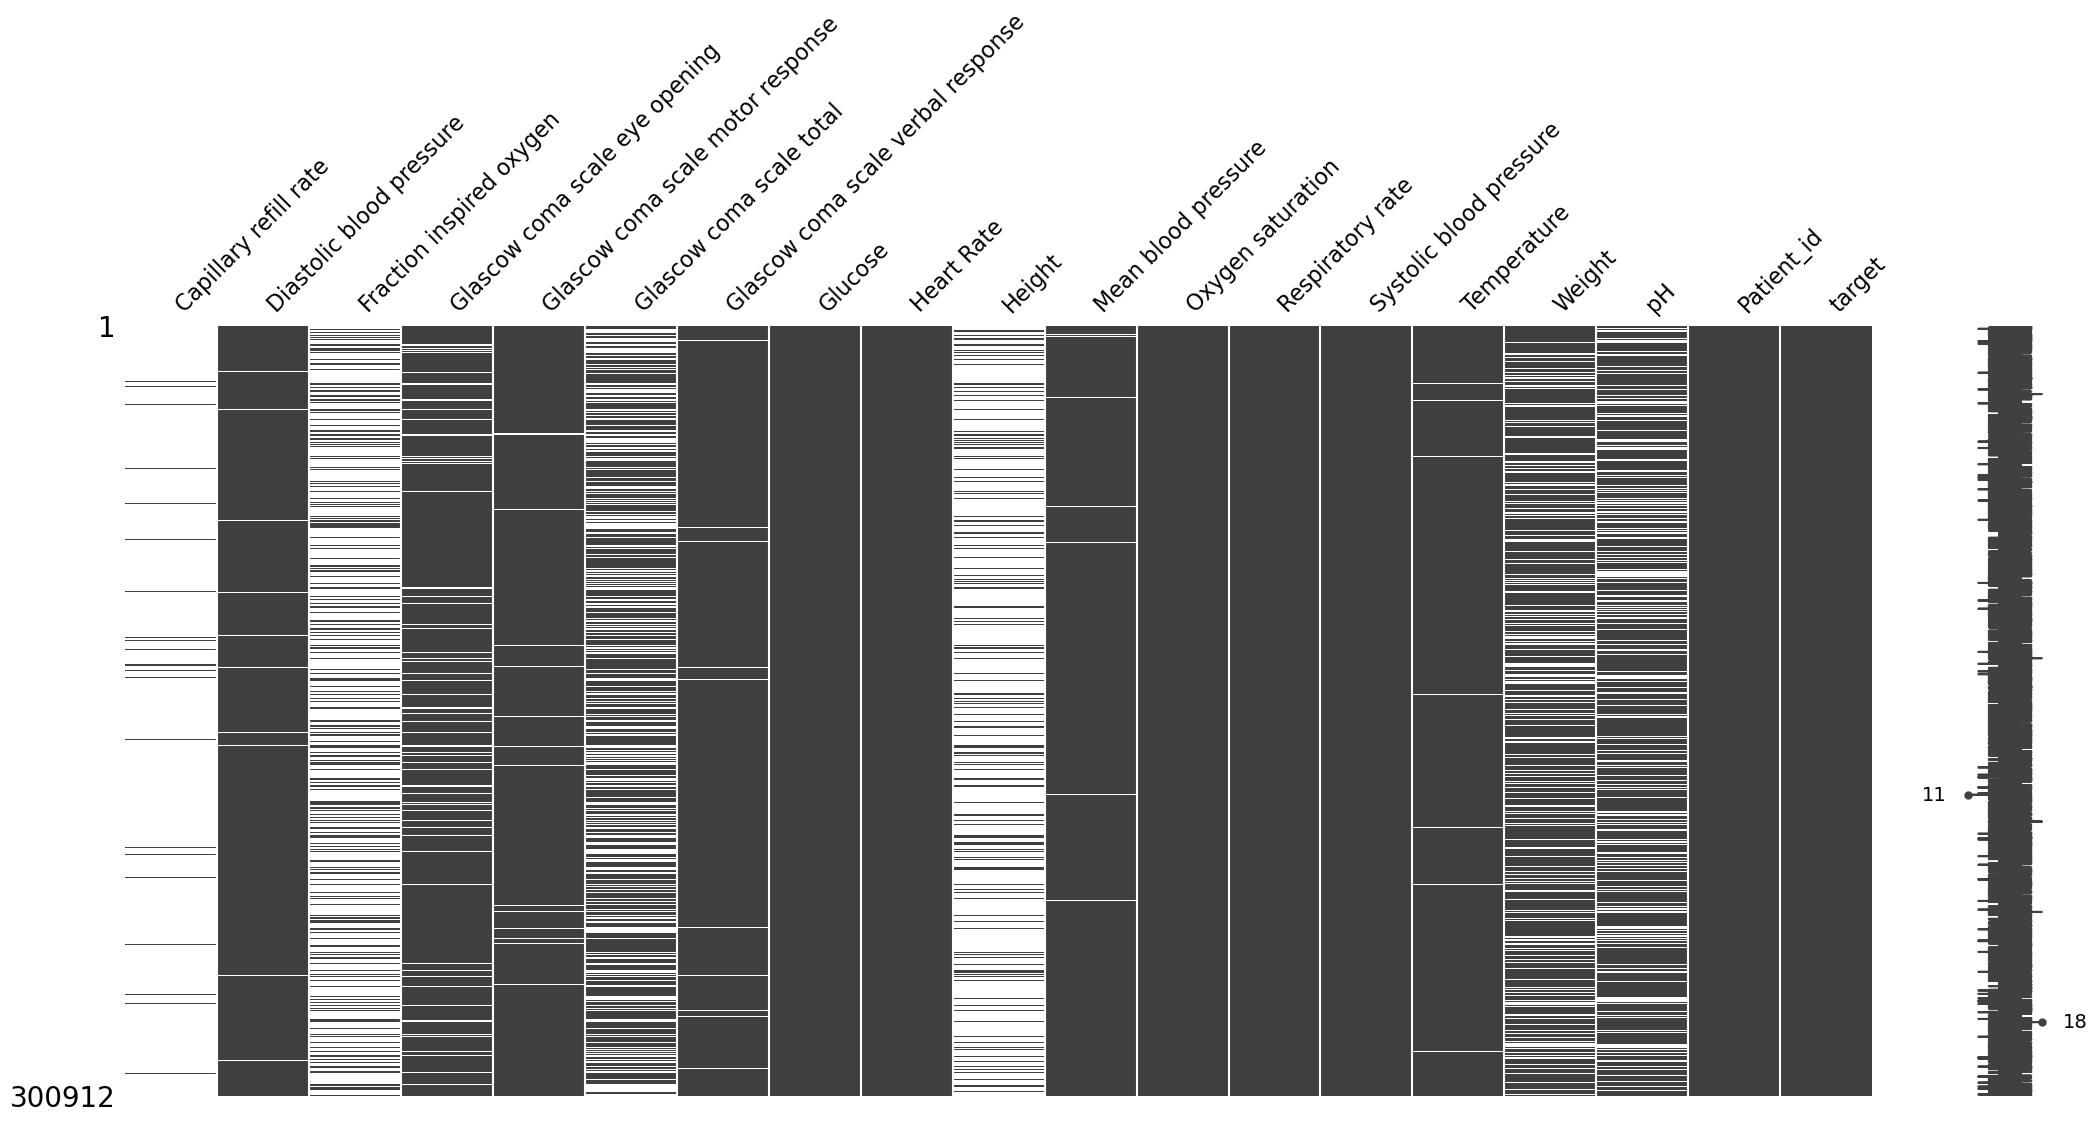

In [30]:
# Visualizing the missing values

# pip install missingno
import missingno as mn

mn.matrix(df);

- Based on the diagram above, the capillary refill rate seems to have highest number of missing values(this is the same observation made in terms of the percentage of missing values). 
- Fraction inspired oxygen and Height also seems to have a lot of missing values.

**Task 1:** 
**Delete records that contain incomplete values in categorical variables. Document this process through screenshots of the applied filter and the resulting variables after the operation.**

The categorical variables with the percentage of missing values in this dataset include: 

  - Glascow coma scale eye opening -  8.880%
  - Glascow coma scale motor response - 1.307%
  - Glascow coma scale verbal response - 1.338%
  - Patient_id - 0.00
  - Also based on the boxplot above the Capillary refill rate seems to be a categorical variable. - 97.894401%

In [31]:
# Dropping the missing values from the categorical variables
# Drop rows with missing values in the specified columns
df_cleaned = df.dropna(subset=['Glascow coma scale eye opening','Glascow coma scale motor response','Glascow coma scale verbal response','Patient_id','Capillary refill rate'])

In [32]:
# checking the percentage of missing values
missing_percentage = df_cleaned.isnull().mean() * 100
print(missing_percentage)


Capillary refill rate                   0.000000
Diastolic blood pressure                1.150748
Fraction inspired oxygen               95.495644
Glascow coma scale eye opening          0.000000
Glascow coma scale motor response       0.000000
Glascow coma scale total                0.000000
Glascow coma scale verbal response      0.000000
Glucose                                 0.690449
Heart Rate                              0.000000
Height                                100.000000
Mean blood pressure                     1.578169
Oxygen saturation                       0.000000
Respiratory rate                        0.000000
Systolic blood pressure                 0.000000
Temperature                             0.000000
Weight                                 49.169818
pH                                     13.956929
Patient_id                              0.000000
target                                  0.000000
dtype: float64


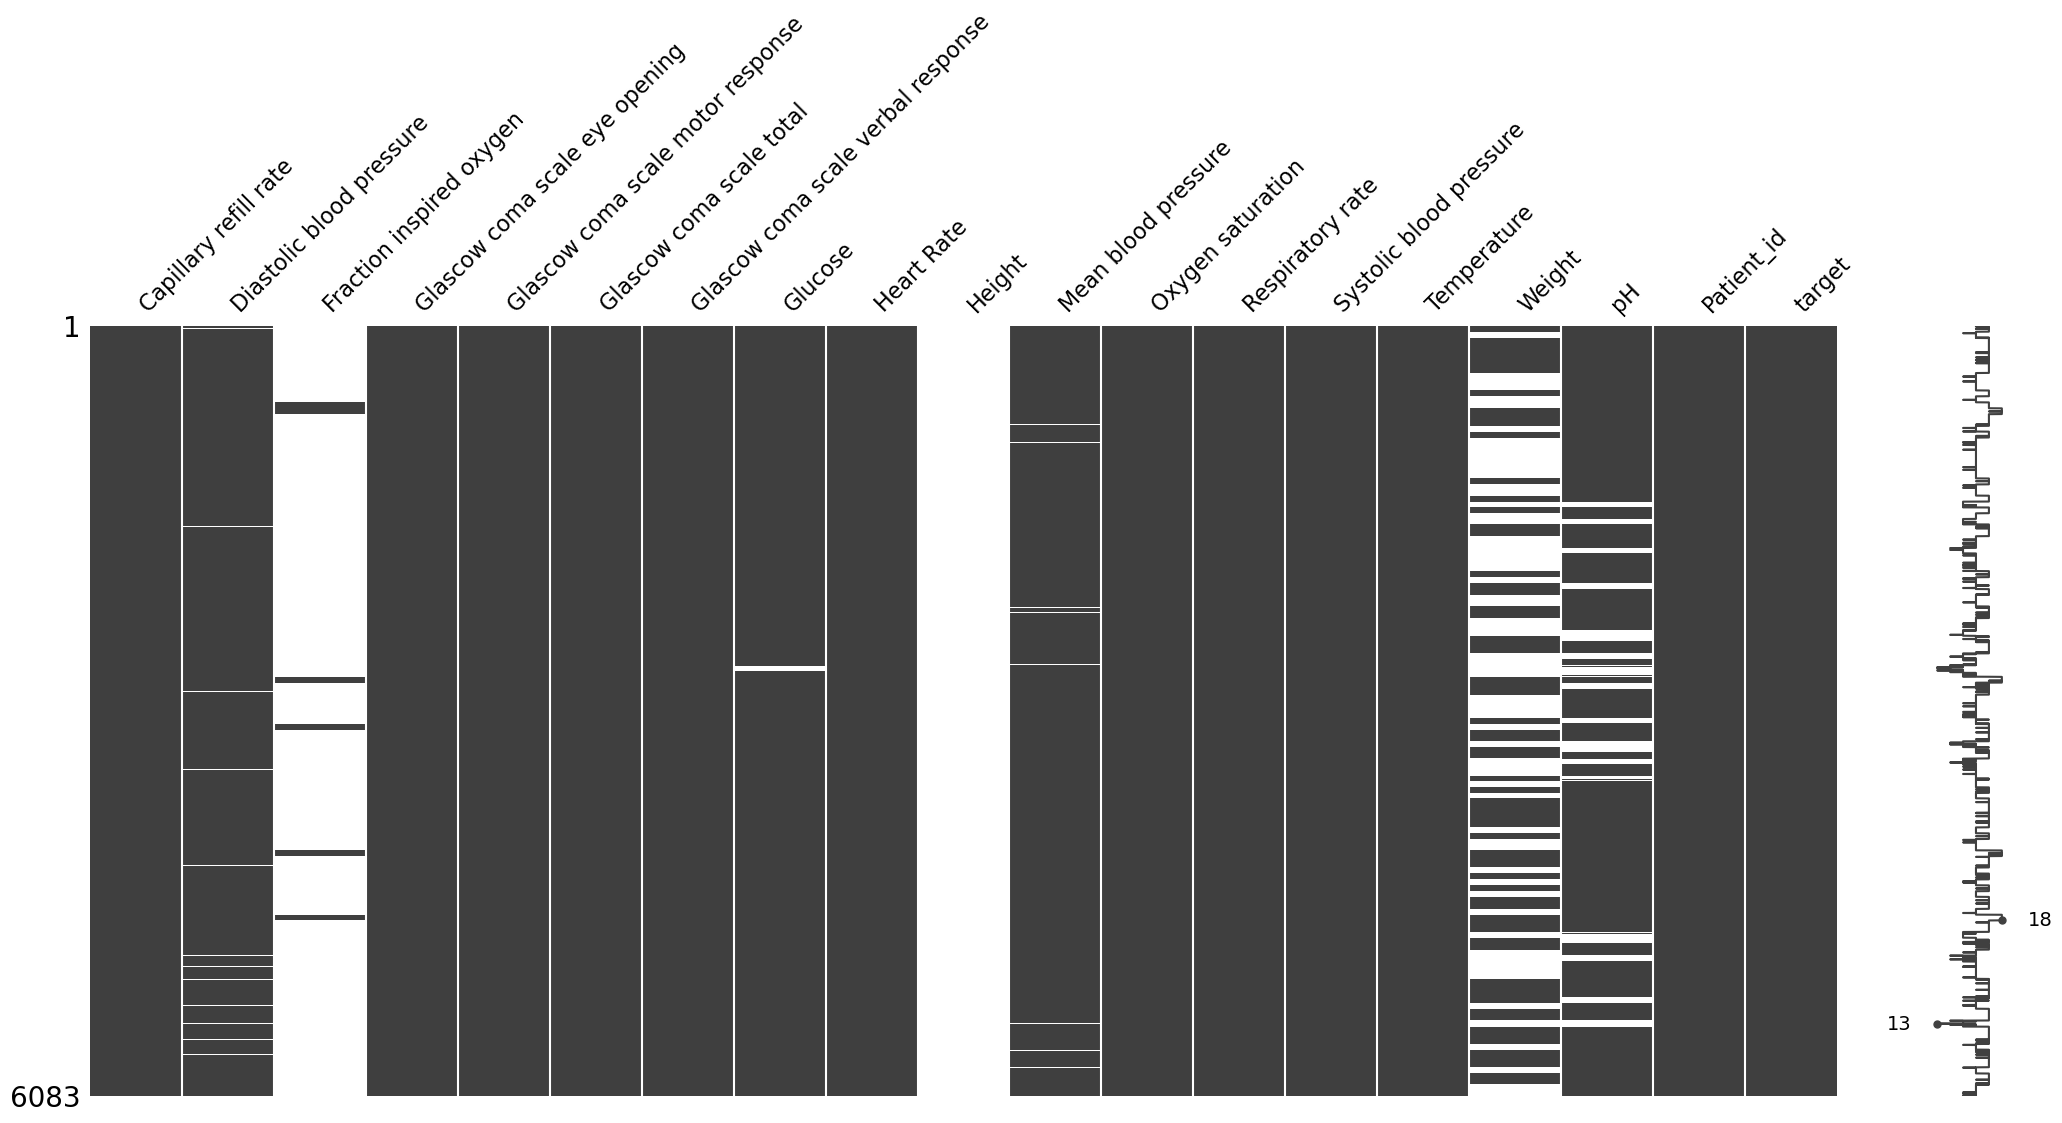

In [33]:
# Visulizing the missing values
mn.matrix(df_cleaned);

**Observation made:**
- After dropping the null values in the categoriacal columns, the percentage of the missing values in the height column increasing to 100%. This is also observed in the diagram above.
- The same occurs with fraction inspired oxygen where the percentage of missing values increases from 70.6% to 95.49%.
- The missing values in the pH column decrease from 23.36% to 13.95%.

## Outlier and Missing Values Treatment

**Task 2: Treatment of Outliers and Missing Values in Numerical Variables: Delete values considered outliers in numerical variables. Replace missing vaues with central tendency values.**

In [34]:
#Defining a function to detect outliers using the IQR method
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Return a boolean mask indicating if a value is an outlier
    return (df[column] < lower_bound) | (df[column] > upper_bound)

# Remove outliers
for col in df_cleaned.select_dtypes(include=[np.number]).columns:
    outliers = find_outliers(df_cleaned, col)
    df2 = df_cleaned[~outliers]

In [35]:
df2

,Capillary refill rate,Diastolic blood pressure,Fraction inspired oxygen,Glascow coma scale eye opening,Glascow coma scale motor response,Glascow coma scale total,Glascow coma scale verbal response,Glucose,Heart Rate,Height,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature,Weight,pH,Patient_id,target
768,0.0,69.0,NaN,4 Spontaneously,6 Obeys Commands,15.0,5 Oriented,123.0,88.0,NaN,NaN,98.0,16.0,144.0,37.444445,108.0,7.29,19096,0
769,0.0,70.0,NaN,4 Spontaneously,6 Obeys Commands,15.0,5 Oriented,123.0,87.0,NaN,93.333298,97.0,15.0,140.0,37.444445,108.0,7.29,19096,0
770,0.0,59.0,NaN,4 Spontaneously,6 Obeys Commands,15.0,5 Oriented,123.0,87.0,NaN,83.333298,97.0,16.0,132.0,37.444445,108.0,7.29,19096,0
771,0.0,72.0,NaN,4 Spontaneously,6 Obeys Commands,15.0,5 Oriented,123.0,88.0,NaN,92.666702,98.0,18.0,134.0,37.444445,108.0,7.29,19096,0
772,0.0,59.0,NaN,4 Spontaneously,6 Obeys Commands,15.0,5 Oriented,123.0,87.0,NaN,85.333298,97.0,16.0,138.0,37.444445,108.0,7.29,19096,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292123,0.0,57.0,NaN,3 To speech,6 Obeys Commands,13.0,4 Confused,153.0,86.0,NaN,84.000000,98.0,19.0,134.0,37.444445,NaN,7.28,26726,0
292124,0.0,56.0,NaN,3 To speech,6 Obeys Commands,13.0,4 Confused,153.0,121.0,NaN,81.000000,94.0,19.0,134.0,37.444445,NaN,7.28,26726,0
292125,0.0,69.0,NaN,3 To speech,6 Obeys Commands,13.0,4 Confused,153.0,109.0,NaN,97.000000,94.0,20.0,158.0,37.444445,NaN,7.28,26726,0
292126,0.0,69.0,NaN,3 To speech,6 Obeys Commands,13.0,4 Confused,153.0,127.0,NaN,97.000000,95.0,21.0,158.0,37.444445,NaN,7.28,26726,0


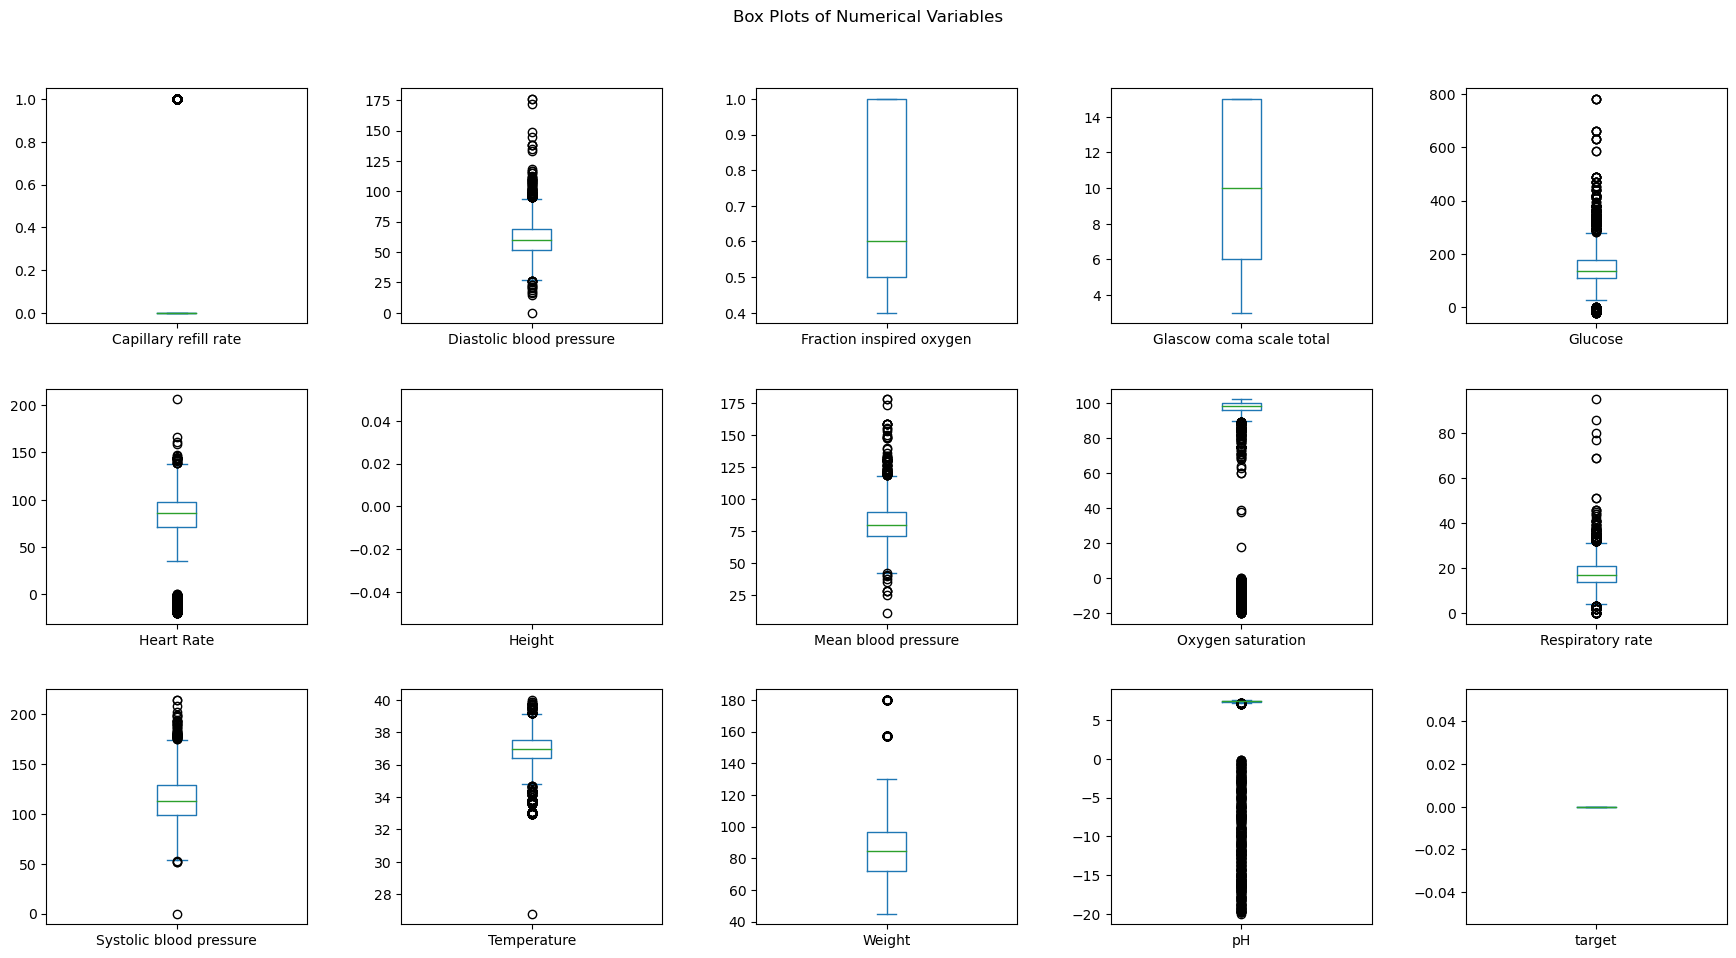

In [36]:
# Boxplots

# Select only numerical columns (float64 and int64)
numerical_columns = df2.select_dtypes(include=['float64', 'int64'])

# Plot boxplots for each numerical variable
numerical_columns.plot(kind='box', subplots=True, layout=(3, 5), figsize=(18, 10), title='Box Plots of Numerical Variables')

plt.suptitle('Box Plots of Numerical Variables')  # Adding a super title for the entire figure
plt.tight_layout(pad=3.0)  # Adjusts the layout to make sure labels and titles fit well
plt.show()


Observation made:

- The dataset seems to still have outliers, however the range of values has decreased.  Should another iteration of dealing with outliers be done?

In [37]:
# Attempting the flooring and capping  method

def apply_flooring_and_capping(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# Apply flooring and capping to numerical columns
for col in df2.select_dtypes(include=[np.number]).columns:
    apply_flooring_and_capping(df2, col)

df2


,Capillary refill rate,Diastolic blood pressure,Fraction inspired oxygen,Glascow coma scale eye opening,Glascow coma scale motor response,Glascow coma scale total,Glascow coma scale verbal response,Glucose,Heart Rate,Height,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature,Weight,pH,Patient_id,target
768,0.0,69.0,NaN,4 Spontaneously,6 Obeys Commands,15.0,5 Oriented,123.0,88.0,NaN,NaN,98.0,16.0,144.0,37.444445,108.0,7.29,19096,0
769,0.0,70.0,NaN,4 Spontaneously,6 Obeys Commands,15.0,5 Oriented,123.0,87.0,NaN,93.333298,97.0,15.0,140.0,37.444445,108.0,7.29,19096,0
770,0.0,59.0,NaN,4 Spontaneously,6 Obeys Commands,15.0,5 Oriented,123.0,87.0,NaN,83.333298,97.0,16.0,132.0,37.444445,108.0,7.29,19096,0
771,0.0,72.0,NaN,4 Spontaneously,6 Obeys Commands,15.0,5 Oriented,123.0,88.0,NaN,92.666702,98.0,18.0,134.0,37.444445,108.0,7.29,19096,0
772,0.0,59.0,NaN,4 Spontaneously,6 Obeys Commands,15.0,5 Oriented,123.0,87.0,NaN,85.333298,97.0,16.0,138.0,37.444445,108.0,7.29,19096,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292123,0.0,57.0,NaN,3 To speech,6 Obeys Commands,13.0,4 Confused,153.0,86.0,NaN,84.000000,98.0,19.0,134.0,37.444445,NaN,7.28,26726,0
292124,0.0,56.0,NaN,3 To speech,6 Obeys Commands,13.0,4 Confused,153.0,121.0,NaN,81.000000,94.0,19.0,134.0,37.444445,NaN,7.28,26726,0
292125,0.0,69.0,NaN,3 To speech,6 Obeys Commands,13.0,4 Confused,153.0,109.0,NaN,97.000000,94.0,20.0,158.0,37.444445,NaN,7.28,26726,0
292126,0.0,69.0,NaN,3 To speech,6 Obeys Commands,13.0,4 Confused,153.0,127.0,NaN,97.000000,95.0,21.0,158.0,37.444445,NaN,7.28,26726,0


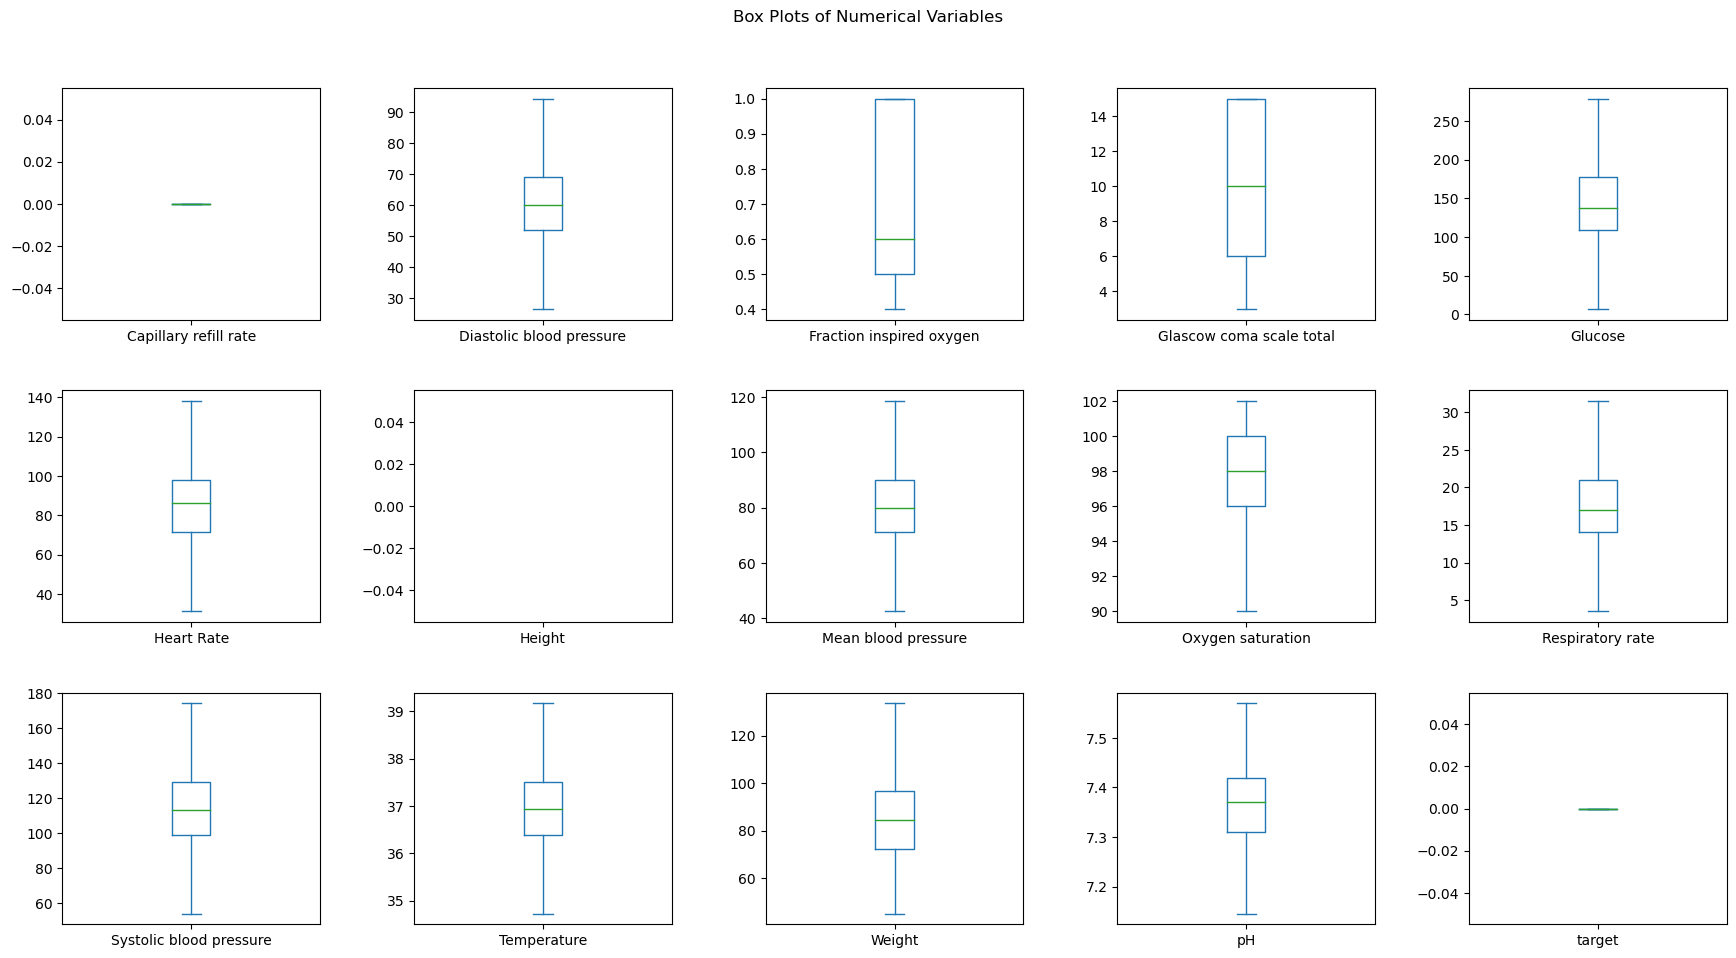

In [38]:
# Boxplots

# Select only numerical columns (float64 and int64)
numerical_columns = df2.select_dtypes(include=['float64', 'int64'])

# Plot boxplots for each numerical variable
numerical_columns.plot(kind='box', subplots=True, layout=(3, 5), figsize=(18, 10), title='Box Plots of Numerical Variables')

plt.suptitle('Box Plots of Numerical Variables')  # Adding a super title for the entire figure
plt.tight_layout(pad=3.0)  # Adjusts the layout to make sure labels and titles fit well
plt.show()


- We have no more outliers present in the dataset.

**Missing values treatment**

In [39]:
# checking the percentage of missing values
missing_percentage = df2.isnull().mean() * 100
print(missing_percentage)

Capillary refill rate                   0.000000
Diastolic blood pressure                1.171137
Fraction inspired oxygen               95.655459
Glascow coma scale eye opening          0.000000
Glascow coma scale motor response       0.000000
Glascow coma scale total                0.000000
Glascow coma scale verbal response      0.000000
Glucose                                 0.793351
Heart Rate                              0.000000
Height                                100.000000
Mean blood pressure                     1.624481
Oxygen saturation                       0.000000
Respiratory rate                        0.000000
Systolic blood pressure                 0.000000
Temperature                             0.000000
Weight                                 50.396675
pH                                     15.205893
Patient_id                              0.000000
target                                  0.000000
dtype: float64


In [40]:
# Dropping columns with more than 50% missing values
threshold = len(df2) * 0.5
df3 = df2.dropna(thresh=threshold, axis=1)
# checking the percentage of missing values
missing_percentage = df3.isnull().mean() * 100
print(missing_percentage)

Capillary refill rate                  0.000000
Diastolic blood pressure               1.171137
Glascow coma scale eye opening         0.000000
Glascow coma scale motor response      0.000000
Glascow coma scale total               0.000000
Glascow coma scale verbal response     0.000000
Glucose                                0.793351
Heart Rate                             0.000000
Mean blood pressure                    1.624481
Oxygen saturation                      0.000000
Respiratory rate                       0.000000
Systolic blood pressure                0.000000
Temperature                            0.000000
pH                                    15.205893
Patient_id                             0.000000
target                                 0.000000
dtype: float64


- Notice that the columns that had more than 50% missing values have been dropped.
- So what next? We now impute the remaining missing values using the median

In [41]:
# Select numerical columns
numerical_cols = df3.select_dtypes(include=[np.number])

#Impute missing values in numerical columns using the median
df3[numerical_cols.columns] = numerical_cols.fillna(numerical_cols.median())
# checking the percentage of missing values
missing_percentage = df3.isnull().mean() * 100
missing_percentage

Capillary refill rate                 0.0
Diastolic blood pressure              0.0
Glascow coma scale eye opening        0.0
Glascow coma scale motor response     0.0
Glascow coma scale total              0.0
Glascow coma scale verbal response    0.0
Glucose                               0.0
Heart Rate                            0.0
Mean blood pressure                   0.0
Oxygen saturation                     0.0
Respiratory rate                      0.0
Systolic blood pressure               0.0
Temperature                           0.0
pH                                    0.0
Patient_id                            0.0
target                                0.0
dtype: float64

- Notice that we no longer have any missing values present in the dataset.

**Task 3: Post-Processing Statistical Description: Recalculate the statistical description of the variables. Verify that the data set does not contain outliers or missing values.**

In [42]:
# Descriptive Statistics
df3.describe()

,Capillary refill rate,Diastolic blood pressure,Glascow coma scale total,Glucose,Heart Rate,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature,pH,target
count,5294.0,5294.000000,5294.000000,5294.000000,5294.000000,5294.000000,5294.000000,5294.000000,5294.000000,5294.000000,5294.000000,5294.0
mean,0.0,60.660559,10.104836,141.793918,83.318332,80.938704,97.291651,17.765017,114.471477,36.939094,7.356418,0.0
std,0.0,13.273810,4.630475,61.600798,22.685206,14.075602,3.182754,5.855697,22.268458,0.891370,0.088120,0.0
min,0.0,26.500000,3.000000,7.000000,31.125000,42.500000,90.000000,3.500000,54.000000,34.722252,7.145000,0.0
25%,0.0,52.000000,6.000000,109.000000,71.250000,71.000000,96.000000,14.000000,99.000000,36.388901,7.330000,0.0
50%,0.0,60.000000,10.000000,138.000000,86.000000,80.000000,98.000000,17.000000,113.000000,36.944444,7.370000,0.0
75%,0.0,68.000000,15.000000,177.000000,98.000000,90.000000,100.000000,21.000000,129.000000,37.500000,7.410000,0.0
max,0.0,94.500000,15.000000,279.000000,138.125000,118.500000,102.000000,31.500000,174.000000,39.166649,7.570000,0.0


Observation made:

- After performing preprocessing, the range of the diastolic blood pressure and systolic blood pressure decreases.

**Task 4: Analysis of Advantages and Disadvantages: Perform an analysis that evaluates the advantages and disadvantages of the data preprocessing process carried out. Provide an evaluation of the results obtained**

| Before Preprocessing                        | After preprocessing                                                          |
|-------------------------------------|-----------------------------------------------------------------------------|
| Some variables had more than 50% of missing values         | The missing values were dealt with by dropping some and imputing others. Thus ensuring that the dataset is complete  |
| The dataset had very extreme outliers           | After preprocessing the dataset did not have any more outliers |